1. Ce îi poate face pe oameni fericiți? Se consideră problema predicției gradului de fericire a populației globului folosind informații despre diferite caracteristici a bunăstării respectivei populații precum Produsul intern brut al țării în care locuiesc (gross domestic product – GBP), gradul de fericire, etc. Folsind datele aferente anului 2017 link, să se realizeze o predicție a gradului de fericire în funcție:

 - doar de Produsul intern brut

In [1]:
!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab06/SGD/data/world-happiness-report-2017.csv

--2024-04-12 05:14:40--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab06/SGD/data/world-happiness-report-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29379 (29K) [text/plain]
Saving to: ‘world-happiness-report-2017.csv’

world-happiness-rep 100%[===================>]  28.69K  --.-KB/s    in 0.002s  

2024-04-12 05:14:40 (12.5 MB/s) - ‘world-happiness-report-2017.csv’ saved [29379/29379]



In [128]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, hinge_loss

In [3]:
class MyBGDRegression:
  def __init__(self):
    self.intercept_ = 0.0
    self.coef_ = []

  def fit(self, x, y, learningRate=0.001, noEpochs=10000):
    self.coef_ = [0.0 for _ in range(len(x[0]) + 1)]

    for epoch in range(noEpochs):
      sumErrors = [0.0 for _ in range(len(x[0]) + 1)]
      for i in range(len(x)):
        ycomputed = self.eval(x[i])
        crtError = ycomputed - y[i]

        for j in range(0, len(x[0])):
          sumErrors[j] += crtError * x[i][j]
        sumErrors[-1] += crtError

      for j in range(len(self.coef_)):
        self.coef_[j] = self.coef_[j] - learningRate * sumErrors[j] / len(x)

    self.intercept_ = self.coef_[-1]
    self.coef_ = self.coef_[:-1]

  def eval(self, xi):
    yi = self.coef_[-1]
    for j in range(len(xi)):
      yi += self.coef_[j] * xi[j]
    return yi

  def predict(self, x):
    if (len(x[0]) == 1):
      yComputed = [self.intercept_ + self.coef_[0] * xi[0] for xi in x]
    else:
      yComputed = [self.intercept_ + self.coef_[0] * xi[0] + self.coef_[1] * xi[1] for xi in x]
    return yComputed

In [4]:
def loadData(fileName, inputVariabName, outputVariabName):
  data = []
  dataNames = []
  with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
      if line_count == 0:
        dataNames = row
      else:
        data.append(row)
      line_count += 1
  selectedVariable = dataNames.index(inputVariabName)
  inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
  selectedOutput = dataNames.index(outputVariabName)
  outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

  return inputs, outputs

crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in: ', inputs[:5])
print('out: ', outputs[:5])

in:  [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


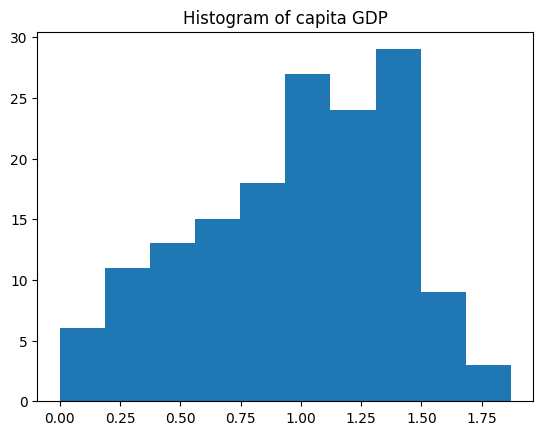

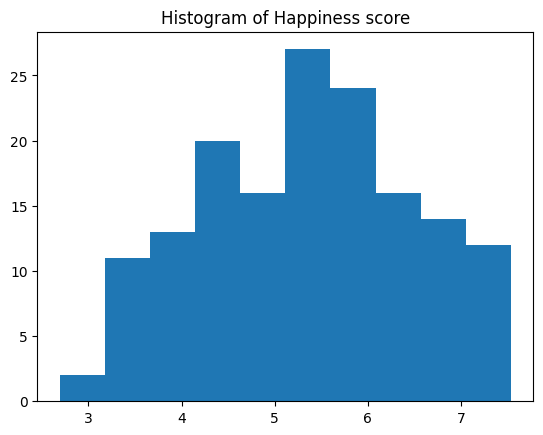

In [5]:
def plotData(x, variableName):
  n, bins, patches = plt.hist(x, 10)
  plt.title('Histogram of ' + variableName)
  plt.show()

plotData(inputs, "capita GDP")
plotData(outputs, "Happiness score")

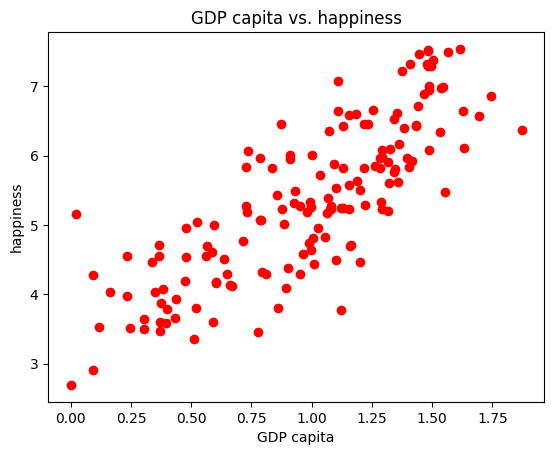

In [6]:
plt.plot(inputs, outputs, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

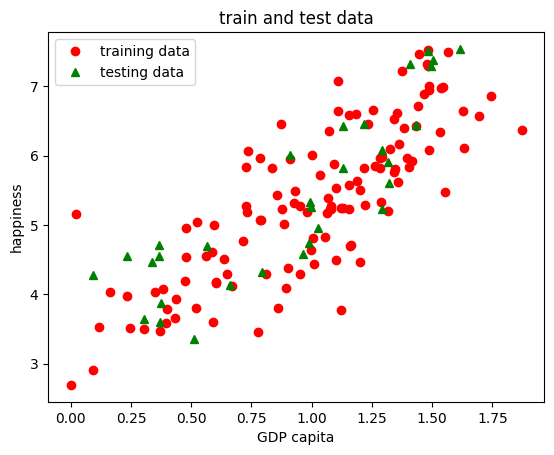

In [7]:
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')
plt.plot(testInputs, testOutputs, 'g^', label = 'testing data')
plt.title('train and test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [8]:
xx = [[el] for el in trainInputs]
regressor = linear_model.SGDRegressor(max_iter=10000, tol=1e-6, eta0=0.001, learning_rate='constant', penalty=None, random_state=42)
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_[0], regressor.coef_[0]
print('the learnt model with tool: f(x) = ', w0, ' + ', w1, ' * x')

# My regression:
myRegressor = MyBGDRegression()
myRegressor.fit(xx, trainOutputs)
myW0, myW1 = myRegressor.intercept_, myRegressor.coef_[0]
print('the learnt model with myRegression: f(x) = ', myW0, ' + ', myW1, ' * x')

the learnt model with tool: f(x) =  3.139548968732384  +  2.207575024741889  * x
the learnt model with myRegression: f(x) =  2.903565499410793  +  2.423277669570128  * x


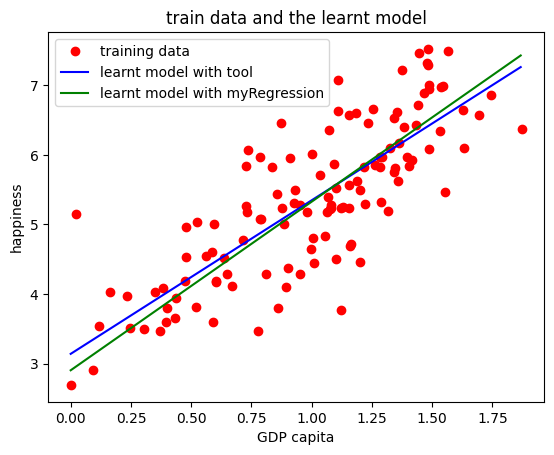

In [9]:
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]
myYref = [myW0 + myW1 * el for el in xref]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')
plt.plot(xref, yref, 'b-', label = 'learnt model with tool')
plt.plot(xref, myYref, 'g-', label = 'learnt model with myRegression')
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

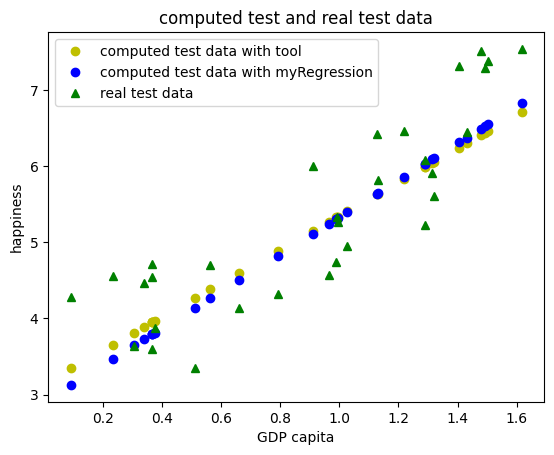

In [10]:
computedTestOutputs = regressor.predict([[x] for x in testInputs])
myComputedTestOutputs = myRegressor.predict([[x] for x in testInputs])

plt.plot(testInputs, computedTestOutputs, 'yo', label = 'computed test data with tool')
plt.plot(testInputs, myComputedTestOutputs, 'bo', label = 'computed test data with myRegression')
plt.plot(testInputs, testOutputs, 'g^', label = 'real test data')
plt.title('computed test and real test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [11]:
print('with tool')
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

error = mean_squared_error(testOutputs, computedTestOutputs)
print('prediction error (tool):  ', error)

print()
print('with myRegression')
error = 0.0
for t1, t2 in zip(myComputedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)
print('prediction error (manual): ', error)

error = mean_squared_error(testOutputs, myComputedTestOutputs)
print('prediction error (tool):  ', error)

with tool
prediction error (manual):  0.41327723024275487
prediction error (tool):   0.41327723024275487

with myRegression
prediction error (manual):  0.4252441842112203
prediction error (tool):   0.4252441842112203


 - de Produsul intern brut si de gradul de libertate.

In [12]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
  data = []
  dataNames = []
  with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
      if line_count == 0:
        dataNames = row
      else:
        data.append(row)
      line_count += 1
  selectedVariable1 = dataNames.index(inputVariabNames[0])
  selectedVariable2 = dataNames.index(inputVariabNames[1])
  inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
  selectedOutput = dataNames.index(outputVariabName)
  outputs = [float (data[i][selectedOutput]) for i in range(len(data))]

  return inputs, outputs

inputsGDPFreedom, outputsGDPFreedom = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

inputsGDP = [ex[0] for ex in inputsGDPFreedom]
inputsFreedom = [ex[1] for ex in inputsGDPFreedom]

print('in GDP: ', inputsGDP[:5])
print('in Freedom: ', inputsFreedom[:5])
print('out: ', outputsGDPFreedom[:5])

in GDP:  [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
in Freedom:  [0.635422587394714, 0.626006722450256, 0.627162635326385, 0.620070576667786, 0.617950856685638]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


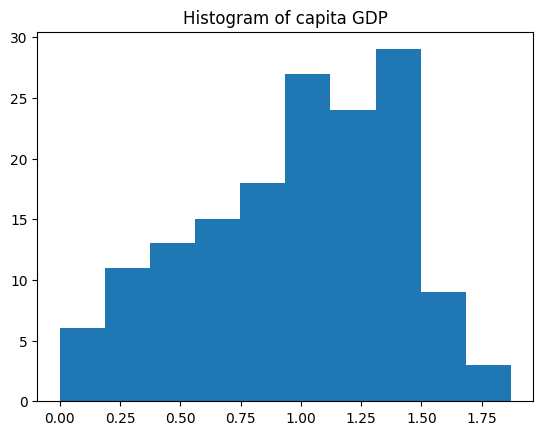

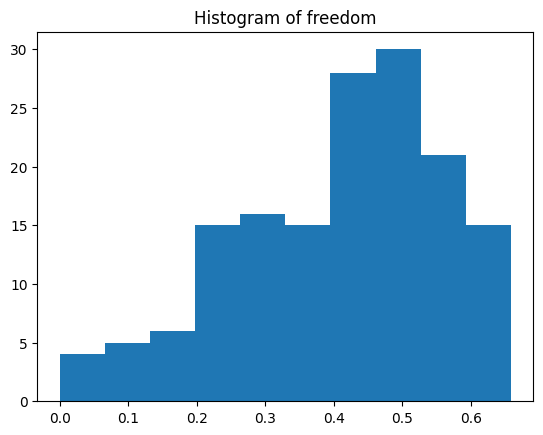

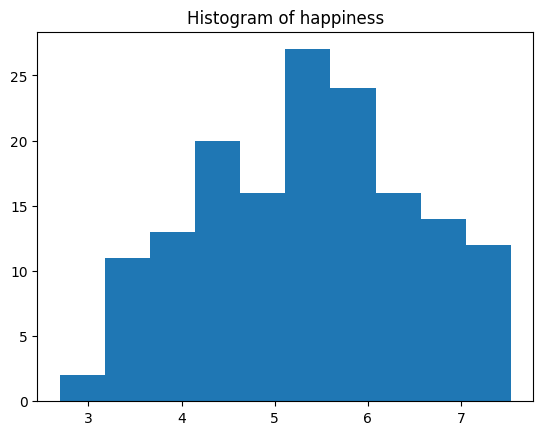

In [13]:
plotData(inputsGDP, 'capita GDP')
plotData(inputsFreedom, 'freedom')
plotData(outputsGDPFreedom, 'happiness')

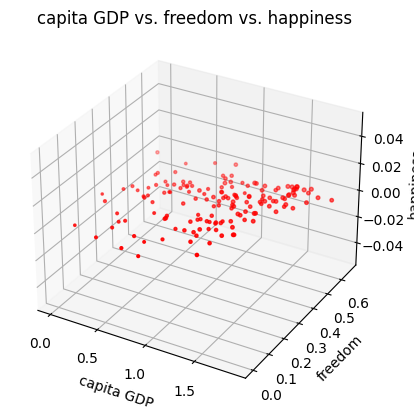

In [14]:
ax = plt.axes(projection='3d')
plt.scatter(inputsGDP, inputsFreedom, outputsGDPFreedom, c='r', marker='o')
ax.set_xlabel('capita GDP')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
plt.title('capita GDP vs. freedom vs. happiness')
plt.show()

In [15]:
def normalisation(trainData, testData):
  scaler = StandardScaler()
  if not isinstance(trainData[0], list):
    trainData =[[d] for d in trainData]
    testData = [[d] for d in testData]

    scaler.fit(trainData)
    normalisedTrainData = scaler.transform(trainData)
    normalisedTestData = scaler.transform(testData)

    normalisedTrainData = [el[0] for el in normalisedTrainData]
    normalisedTestData = [el[0] for el in normalisedTestData]
  else:
    scaler.fit(trainData)
    normalisedTrainData = scaler.transform(trainData)
    normalisedTestData = scaler.transform(testData)
  return normalisedTrainData, normalisedTestData

In [16]:
def myNormalisation(trainData, testData):
  normalisedTrainData = []
  normalisedTestData = []

  if not isinstance(trainData[0], list):
    mean = sum(trainData) / len(trainData)
    stdDev = (sum([(x - mean) ** 2 for x in trainData]) /len(trainData)) ** 0.5
    normalisedTrainData = [(x - mean) / stdDev for x in trainData]
    normalisedTestData = [(x - mean) / stdDev for x in testData]
  else:
    for i in range(len(trainData[0])):
      featureTrain = [sample[i] for sample in trainData]
      featureTest = [sample[i] for sample in testData]

      mean = sum(featureTrain) / len(featureTrain)
      stdDev = (sum([(x - mean) ** 2 for x in featureTrain]) / len(featureTrain)) ** 0.5

      normalisedFeatureTrain = [(x - mean) / stdDev for x in featureTrain]
      normalisedFeatureTest = [(x - mean) / stdDev for x in featureTest]

      if i == 0:
        normalisedTrainData = [[x] for x in normalisedFeatureTrain]
        normalisedTestData = [[x] for x in normalisedFeatureTest]
      else:
        for i in range(len(normalisedTrainData)):
          normalisedTrainData[i].append(normalisedFeatureTrain[i])
          normalisedTestData[i].append(normalisedFeatureTest[i])

  return normalisedTrainData, normalisedTestData

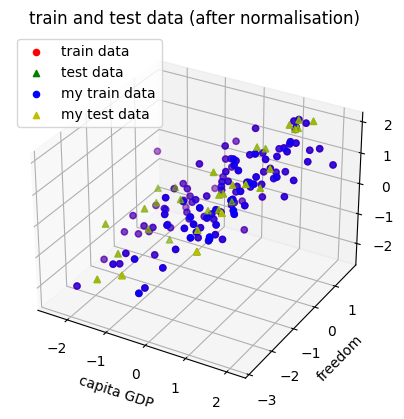

In [17]:
np.random.seed(5)
indexesGDPFreedom = [i for i in range(len(inputsGDPFreedom))]
trainSampleGDPFreedom = np.random.choice(indexesGDPFreedom, int(0.8 * len(inputsGDPFreedom)), replace=False)
testSampleGDPFreedom = [i for i in indexesGDPFreedom if not i in trainSampleGDPFreedom]

trainInputsGDPFreedom = [inputsGDPFreedom[i] for i in trainSampleGDPFreedom]
trainOutputsGDPFreedom = [outputsGDPFreedom[i] for i in trainSampleGDPFreedom]
testInputsGDPFreedom = [inputsGDPFreedom[i] for i in testSampleGDPFreedom]
testOutputsGDPFreedom = [outputsGDPFreedom[i] for i in testSampleGDPFreedom]

trainInputsGDPFreedom, testInputsGDPFreedom = normalisation(trainInputsGDPFreedom, testInputsGDPFreedom)
trainOutputsGDPFreedom, testOutputsGDPFreedom = normalisation(trainOutputsGDPFreedom, testOutputsGDPFreedom)

myTrainInputsGDPFreedom, myTestInputsGDPFreedom = myNormalisation(trainInputsGDPFreedom, testInputsGDPFreedom)
myTrainOutputsGDPFreedom, myTestOutputsGDPFreedom = myNormalisation(trainOutputsGDPFreedom, testOutputsGDPFreedom)

trainInputsGDP = [ex[0] for ex in trainInputsGDPFreedom]
trainInputsFreedom = [ex[1] for ex in trainInputsGDPFreedom]

myTrainInputsGDP = [ex[0] for ex in myTrainInputsGDPFreedom]
myTrainInputsFreedom = [ex[1] for ex in myTrainInputsGDPFreedom]

testInputsGDP = [ex[0] for ex in testInputsGDPFreedom]
testInputsFreedom = [ex[1] for ex in testInputsGDPFreedom]

myTestInputsGDP = [ex[0] for ex in myTestInputsGDPFreedom]
myTestInputsFreedom = [ex[1] for ex in myTestInputsGDPFreedom]

ax = plt.axes(projection='3d')
ax.scatter(trainInputsGDP, trainInputsFreedom, trainOutputsGDPFreedom, c='r', marker='o', label='train data')
ax.scatter(testInputsGDP, testInputsFreedom, testOutputsGDPFreedom, c='g', marker='^', label='test data')
ax.scatter(myTrainInputsGDP, myTrainInputsFreedom, myTrainOutputsGDPFreedom, c='b', marker='o', label='my train data')
ax.scatter(myTestInputsGDP, myTestInputsFreedom, myTestOutputsGDPFreedom, c='y', marker='^', label='my test data')
ax.set_xlabel('capita GDP')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
plt.title('train and test data (after normalisation)')
plt.legend()
plt.show()

In [18]:
xxGDPFreedom = [[x1, x2] for (x1, x2) in zip(trainInputsGDP, trainInputsFreedom)]
regressor = linear_model.SGDRegressor(max_iter=10000, tol=1e-6, eta0=0.001, learning_rate='constant', penalty=None, random_state=42)
regressor.fit(xxGDPFreedom, trainOutputsGDPFreedom)
w0GDPFreedom, w1GDPFreedom, w2GDPFreedom = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]
print('the learnt model with tool: f(x) = ', w0GDPFreedom, ' + ', w1GDPFreedom, ' * x1 + ', w2GDPFreedom, ' * x2')

myXxGDPFreedom = [[x1, x2] for (x1, x2) in zip(myTrainInputsGDP, myTrainInputsFreedom)]
myRegressor = MyBGDRegression()
myRegressor.fit(myXxGDPFreedom, myTrainOutputsGDPFreedom)
myW0GDPFreedom, myW1GDPFreedom, myW2GDPFreedom = myRegressor.intercept_, myRegressor.coef_[0], myRegressor.coef_[1]
print('the learnt model with myRegression: f(x) = ', myW0GDPFreedom, ' + ', myW1GDPFreedom, ' * x1 + ', myW2GDPFreedom, ' * x2')

the learnt model with tool: f(x) =  0.000601501369993336  +  0.696938853621978  * x1 +  0.3065056642372981  * x2
the learnt model with myRegression: f(x) =  -2.77318490751833e-17  +  0.6976489806159256  * x1 +  0.3048861017553823  * x2


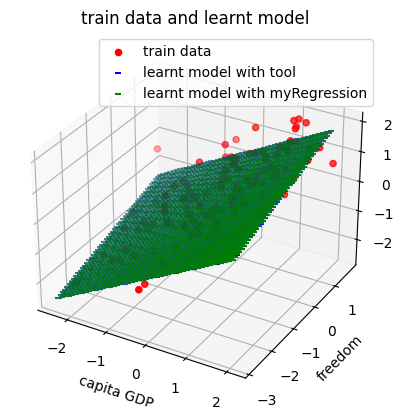

In [19]:
noOfPoints = 50
xref = []
val = min(trainInputsGDP)
step1 = (max(trainInputsGDP) - min(trainInputsGDP)) / noOfPoints
for _ in range(1, noOfPoints):
  for _ in range(1, noOfPoints):
    xref.append(val)
  val += step1

yref = []
val = min(trainInputsFreedom)
step2 = (max(trainInputsFreedom) - min(trainInputsFreedom)) / noOfPoints
for _ in range(1, noOfPoints):
  aux = val
  for _ in range(1, noOfPoints):
    yref.append(aux)
    aux += step2

myXref = []
val = min(myTrainInputsGDP)
step1 = (max(myTrainInputsGDP) - min(myTrainInputsGDP)) / noOfPoints
for _ in range(1, noOfPoints):
  for _ in range(1, noOfPoints):
    myXref.append(val)
  val += step1

myYref = []
val = min(myTrainInputsFreedom)
step2 = (max(myTrainInputsFreedom) - min(myTrainInputsFreedom)) / noOfPoints
for _ in range(1, noOfPoints):
  aux = val
  for _ in range(1, noOfPoints):
    myYref.append(aux)
    aux += step2

zref = [w0GDPFreedom + w1GDPFreedom * x1 + w2GDPFreedom * x2 for x1, x2 in zip(xref, yref)]
myZref = [myW0GDPFreedom + myW1GDPFreedom * x1 + myW2GDPFreedom * x2 for x1, x2 in zip(myXref, myYref)]
ax = plt.axes(projection='3d')
ax.scatter(trainInputsGDP, trainInputsFreedom, trainOutputsGDPFreedom, c='r', marker='o', label='train data')
ax.scatter(xref, yref, zref, c='b', marker='_', label='learnt model with tool')
ax.scatter(myXref, myYref, myZref, c='g', marker='_', label='learnt model with myRegression')
ax.set_xlabel('capita GDP')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
plt.title('train data and learnt model')
plt.legend()
plt.show()





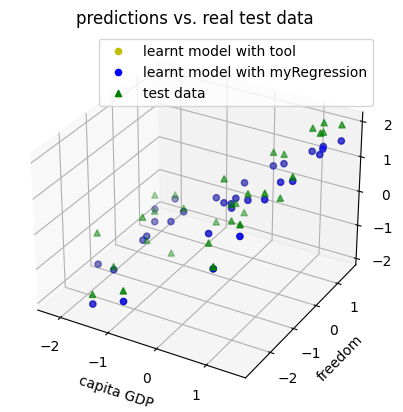

In [20]:
computedTestOutputsGDPFreedom = regressor.predict(testInputsGDPFreedom)
myComputedTestOutputsGDPFreedom = myRegressor.predict(myTestInputsGDPFreedom)

ax = plt.axes(projection='3d')
ax.scatter(testInputsGDP, testInputsFreedom, computedTestOutputsGDPFreedom, c='y', marker='o', label='learnt model with tool')
ax.scatter(myTestInputsGDP, myTestInputsFreedom, myComputedTestOutputsGDPFreedom, c='b', marker='o', label='learnt model with myRegression')
ax.scatter(testInputsGDP, testInputsFreedom, testOutputsGDPFreedom, c='g', marker='^', label='test data')
ax.set_xlabel('capita GDP')
ax.set_ylabel('freedom')
ax.set_zlabel('happiness')
plt.title('predictions vs. real test data')
plt.legend()
plt.show()

In [21]:
print('with tool')
error = 0.0
for t1, t2 in zip(computedTestOutputsGDPFreedom, testOutputsGDPFreedom):
  error += (t1 - t2) ** 2
error = error / len(testOutputsGDPFreedom)
print('prediction error (manual): ', error)

error = mean_squared_error(testOutputsGDPFreedom, computedTestOutputsGDPFreedom)
print('prediction error (tool): ', error)

print()
print('with myRegression')
error = 0.0
for t1, t2 in zip(myComputedTestOutputsGDPFreedom, myTestOutputsGDPFreedom):
  error += (t1 - t2) ** 2
error = error / len(myTestOutputsGDPFreedom)
print('prediction error (manual): ', error)

error = mean_squared_error(myTestOutputsGDPFreedom, myComputedTestOutputsGDPFreedom)
print('prediction error (tool): ', error)

with tool
prediction error (manual):  0.22801181441069193
prediction error (tool):  0.22801181441069196

with myRegression
prediction error (manual):  0.22826726712511533
prediction error (tool):  0.22826726712511536


2. Clasificarea țesuturilor cancerigene Se consideră informații despre cancerul de sân la femei, informații extrase din ecografii mamare (detalii aici) precum: - Tipul malformației identificate (țesut benign sau țesut malign) - Caracteristici numerice ale nucleului celulelor din aceste țesuturi: - raza (media distanțelor între centru si punctele de pe contur) - textura (măsurată prin deviația standard a nivelelor de gri din imaginea asociată țesutului analizat) Folosindu-se aceste date, să se decidă:
  - daca o leziune (dintr-o mamografie) caracterizata printr-o textura de valoare 10 si o raza de valoare 18 este leziune maligna sau benigna

In [22]:
class MyLogisticRegression:
  def __init__(self):
    self.intercept_ = 0.0
    self.coef_ = []

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, x, y, learningRate=0.001, noEpochs=10000):
    self.coef_ = [0.0 for _ in range(len(x[0]))]
    self.intercept_ = 0.0

    for epoch in range(noEpochs):
      preds = [self.sigmoid(self.intercept_ + np.dot(self.coef_, xi)) for xi in x]
      errors = [pred - yi for pred, yi in zip(preds, y)]
      for j in range(len(self.coef_)):
        self.coef_[j] -= learningRate * np.dot(errors, [xi[j] for xi in x]) / len(x)
      self.intercept_ -= learningRate * np.mean(errors)

  def predict_prob(self, x):
    return [self.sigmoid(self.intercept_ + np.dot(self.coef_, xi)) for xi in x]

  def predict(self, x, threshold=0.5):
    return [1 if prob > threshold else 0 for prob in self.predict_prob(x)]

In [24]:
def loadData2(fileName, inputVariabIndexes, outputVariabIndex):
  data = []
  with open(fileName) as data_file:
    csv_reader = csv.reader(data_file, delimiter=',')
    for row in csv_reader:
      data.append(row)
  inputs = [[float(data[i][inputVariabIndexes[0]]), float(data[i][inputVariabIndexes[1]])] for i in range(len(data))]
  outputs = [0 if data[i][outputVariabIndex] == 'B' else 1 for i in range(len(data))]

  return inputs, outputs

filePath2 = os.path.join(crtDir, 'wdbc.data')
inputsRadiusTexture, outputsRadiusTexture = loadData2(filePath2, [2, 3], 1)

inputsRadius = [ex[0] for ex in inputsRadiusTexture]
inputsTexture = [ex[1] for ex in inputsRadiusTexture]

print('in radius: ', inputsRadius[:5])
print('in texture: ', inputsTexture[:5])
print('out: ', outputsRadiusTexture[:5])

in radius:  [17.99, 20.57, 19.69, 11.42, 20.29]
in texture:  [10.38, 17.77, 21.25, 20.38, 14.34]
out:  [1, 1, 1, 1, 1]


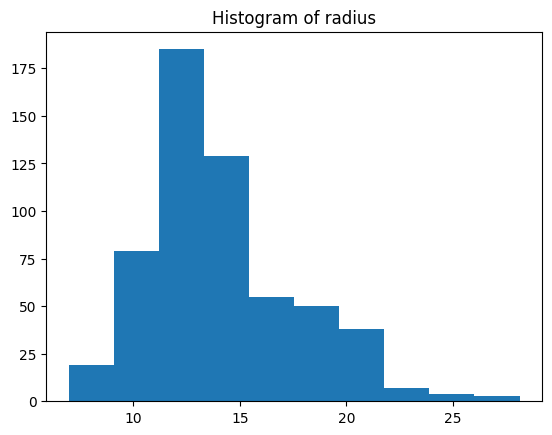

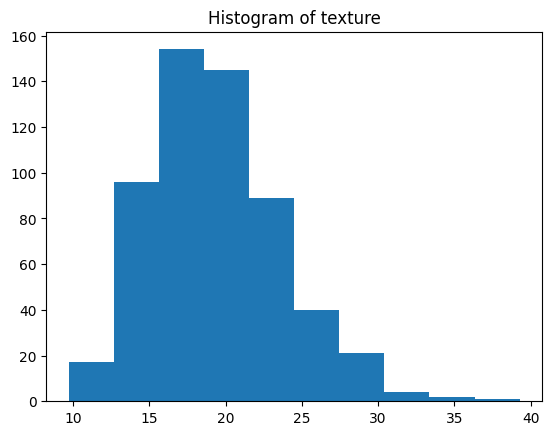

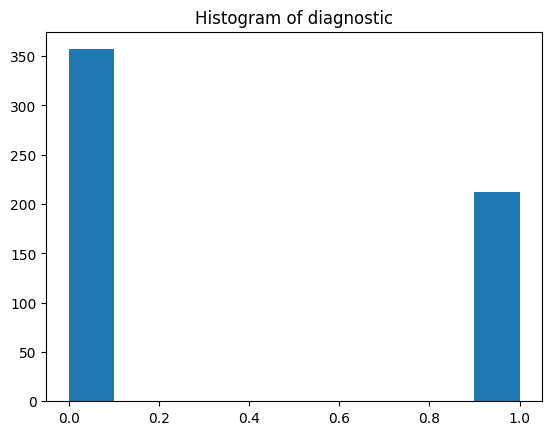

In [25]:
plotData(inputsRadius, 'radius')
plotData(inputsTexture, 'texture')
plotData(outputsRadiusTexture, 'diagnostic')

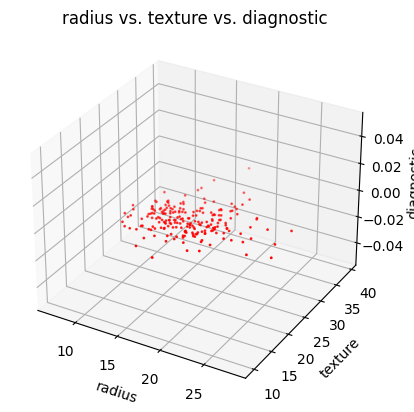

In [26]:
ax = plt.axes(projection='3d')
plt.scatter(inputsRadius, inputsTexture, outputsRadiusTexture, c='r', marker='o')
ax.set_xlabel('radius')
ax.set_ylabel('texture')
ax.set_zlabel('diagnostic')
plt.title('radius vs. texture vs. diagnostic')
plt.show()

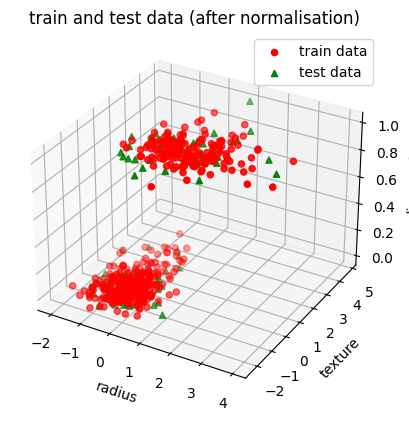

In [27]:
np.random.seed(5)
indexesRadiusTexture = [i for i in range(len(inputsRadiusTexture))]
trainSampleRadiusTexture = np.random.choice(indexesRadiusTexture, int(0.8 * len(inputsRadiusTexture)), replace=False)
testSampleRadiusTexture = [i for i in indexesRadiusTexture if not i in trainSampleRadiusTexture]

trainInputsRadiusTexture = [inputsRadiusTexture[i] for i in trainSampleRadiusTexture]
trainOutputsRadiusTexture = [outputsRadiusTexture[i] for i in trainSampleRadiusTexture]
testInputsRadiusTexture = [inputsRadiusTexture[i] for i in testSampleRadiusTexture]
testOutputsRadiusTexture = [outputsRadiusTexture[i] for i in testSampleRadiusTexture]

trainInputsRadiusTexture, testInputsRadiusTexture = normalisation(trainInputsRadiusTexture, testInputsRadiusTexture)

trainInputsRadius = [ex[0] for ex in trainInputsRadiusTexture]
trainInputsTexture = [ex[1] for ex in trainInputsRadiusTexture]

testInputsRadius = [ex[0] for ex in testInputsRadiusTexture]
testInputsTexture = [ex[1] for ex in testInputsRadiusTexture]

ax = plt.axes(projection='3d')
ax.scatter(trainInputsRadius, trainInputsTexture, trainOutputsRadiusTexture, c='r', marker='o', label='train data')
ax.scatter(testInputsRadius, testInputsTexture, testOutputsRadiusTexture, c='g', marker='^', label='test data')
ax.set_xlabel('radius')
ax.set_ylabel('texture')
ax.set_zlabel('diagnostic')
plt.title('train and test data (after normalisation)')
plt.legend()
plt.show()

In [28]:
xxRadiusTexture = [[x1, x2] for (x1, x2) in zip(trainInputsRadius, trainInputsTexture)]
regressor2 = LogisticRegression()
regressor2.fit(xxRadiusTexture, trainOutputsRadiusTexture)
w0RadiusTexture, w1RadiusTexture, w2RadiusTexture = regressor2.intercept_[0], regressor2.coef_[0][0], regressor2.coef_[0][1]
print('the learnt model with tool: f(x) = ', w0RadiusTexture, ' + ', w1RadiusTexture, ' * x1 + ', w2RadiusTexture, ' * x2')

xxRadiusTexture = [[x1, x2] for (x1, x2) in zip(trainInputsRadius, trainInputsTexture)]
myRegressor2 = MyLogisticRegression()
myRegressor2.fit(xxRadiusTexture, trainOutputsRadiusTexture)
myW0RadiusTexture =  myRegressor2.intercept_
myW1RadiusTexture, myW2RadiusTexture = myRegressor2.coef_[0], myRegressor2.coef_[1]
print('the learnt model with myRegression: f(x) = ', myW0RadiusTexture, ' + ', myW1RadiusTexture, ' * x1 + ', myW2RadiusTexture, ' * x2')

the learnt model with tool: f(x) =  -0.9128165793008214  +  3.7164872586595252  * x1 +  0.9223715121269124  * x2
the learnt model with myRegression: f(x) =  -0.6011240312742392  +  1.5675644522375862  * x1 +  0.6006064844845658  * x2


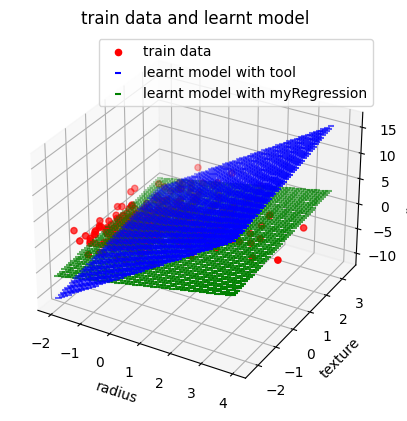

In [29]:
noOfPoints = 50
xref = []
val = min(trainInputsRadius)
step1 = (max(trainInputsRadius) - min(trainInputsRadius)) / noOfPoints
for _ in range(1, noOfPoints):
  for _ in range(1, noOfPoints):
    xref.append(val)
  val += step1

yref = []
val = min(trainInputsTexture)
step2 = (max(trainInputsTexture) - min(trainInputsTexture)) / noOfPoints
for _ in range(1, noOfPoints):
  aux = val
  for _ in range(1, noOfPoints):
    yref.append(aux)
    aux += step2

zref = [w0RadiusTexture + w1RadiusTexture * x1 + w2RadiusTexture * x2 for x1, x2 in zip(xref, yref)]
myZref = [myW0RadiusTexture + myW1RadiusTexture * x1 + myW2RadiusTexture * x2 for x1, x2 in zip(myXref, myYref)]
ax = plt.axes(projection='3d')
ax.scatter(trainInputsRadius, trainInputsTexture, trainOutputsRadiusTexture, c='r', marker='o', label='train data')
ax.scatter(xref, yref, zref, c='b', marker='_', label='learnt model with tool')
ax.scatter(xref, yref, myZref, c='g', marker='_', label='learnt model with myRegression')
ax.set_xlabel('radius')
ax.set_ylabel('texture')
ax.set_zlabel('diagnostic')
plt.title('train data and learnt model')
plt.legend()
plt.show()

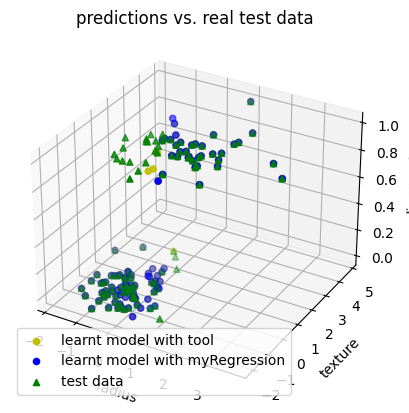

In [30]:
computedTestOutputsRadiusTexture = regressor2.predict(testInputsRadiusTexture)
myComputedTestOutputsRadiusTexture = myRegressor2.predict(testInputsRadiusTexture)

ax = plt.axes(projection='3d')
ax.scatter(testInputsRadius, testInputsTexture, computedTestOutputsRadiusTexture, c='y', marker='o', label='learnt model with tool')
ax.scatter(testInputsRadius, testInputsTexture, myComputedTestOutputsRadiusTexture, c='b', marker='o', label='learnt model with myRegression')
ax.scatter(testInputsRadius, testInputsTexture, testOutputsRadiusTexture, c='g', marker='^', label='test data')
ax.set_xlabel('radius')
ax.set_ylabel('texture')
ax.set_zlabel('diagnostic')
plt.title('predictions vs. real test data')
plt.legend()
plt.show()

In [31]:
print('with tool')
error = 0.0
for t1, t2 in zip(computedTestOutputsRadiusTexture, testOutputsRadiusTexture):
  error += (t1 - t2) ** 2
error = error / len(testOutputsRadiusTexture)
print('prediction error (manual): ', error)

error = mean_squared_error(testOutputsRadiusTexture, computedTestOutputsRadiusTexture)
print('prediction error (tool): ', error)

print()
print('with myRegression')
error = 0.0
for t1, t2 in zip(myComputedTestOutputsRadiusTexture, testOutputsRadiusTexture):
  error += (t1 - t2) ** 2
error = error / len(testOutputsRadiusTexture)
print('prediction error (manual): ', error)

error = mean_squared_error(testOutputsRadiusTexture, myComputedTestOutputsRadiusTexture)
print('prediction error (tool): ', error)

with tool
prediction error (manual):  0.20175438596491227
prediction error (tool):  0.20175438596491227

with myRegression
prediction error (manual):  0.19298245614035087
prediction error (tool):  0.19298245614035087


 - folosirea validarii încrucișate

In [109]:
scores = cross_val_score(regressor2, trainInputsRadiusTexture, trainOutputsRadiusTexture, cv=10)

print('acuratetia medie: ', scores.mean())
print('deviatia standard a acuratetei: ', scores.std())

acuratetia medie:  0.9076328502415458
deviatia standard a acuratetei:  0.032740510107873044


Investigarea diferitelor funcții de loss

Hinge Loss Accuracy Scores: 0.8923076923076924


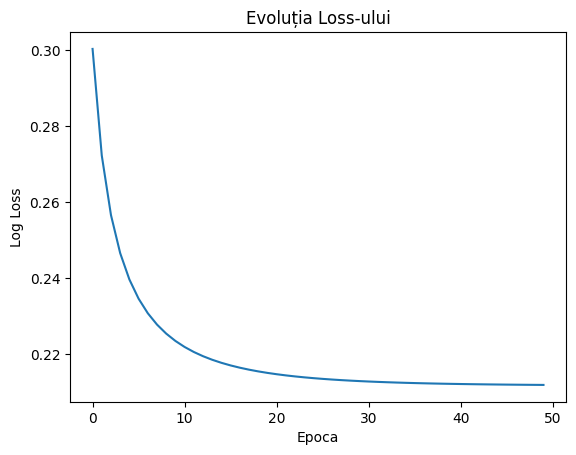

In [125]:
model_log = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, penalty=None, max_iter=1, tol=None, warm_start=True, random_state=42)
model_log.fit(xxRadiusTexture, trainOutputsRadiusTexture)
scores_log = cross_val_score(model_log, trainInputsRadiusTexture, trainOutputsRadiusTexture, cv=5, scoring='accuracy')  # Hinge loss nu are scoring direct, utilizăm acuratețea
print("Hinge Loss Accuracy Scores:", scores_log.mean())

losses = []
epochs = 50  # Numărul de epoci
for _ in range(epochs):
    model_log.partial_fit(trainInputsRadiusTexture, trainOutputsRadiusTexture, classes=[0, 1])
    y_proba = model_log.predict_proba(trainInputsRadiusTexture)
    loss = log_loss(trainOutputsRadiusTexture, y_proba)
    losses.append(loss)

plt.plot(losses)
plt.title('Evoluția Loss-ului')
plt.xlabel('Epoca')
plt.ylabel('Log Loss')
plt.show()

Hinge Loss Accuracy Scores: 0.8945054945054945


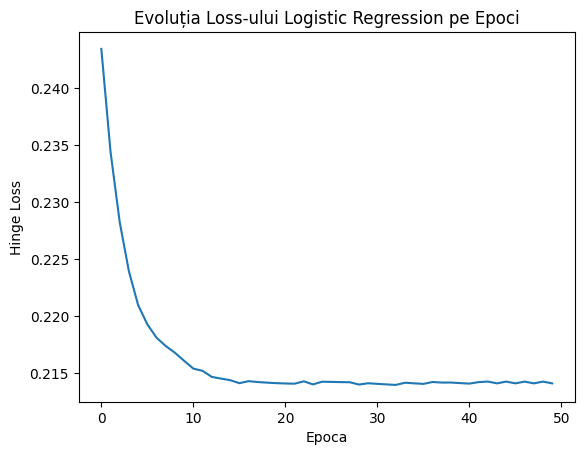

In [129]:
model_hinge = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.01, penalty=None, max_iter=1, tol=None, warm_start=True, random_state=42)
model_hinge.fit(xxRadiusTexture, trainOutputsRadiusTexture)
scores_hinge = cross_val_score(model_hinge, trainInputsRadiusTexture, trainOutputsRadiusTexture, cv=5, scoring='accuracy')
print("Hinge Loss Accuracy Scores:", scores_hinge.mean())

losses = []
epochs = 50
for _ in range(epochs):
    model_hinge.partial_fit(trainInputsRadiusTexture, trainOutputsRadiusTexture)
    decision_scores = model_hinge.decision_function(trainInputsRadiusTexture)
    current_loss = hinge_loss(trainOutputsRadiusTexture, decision_scores, labels=[0, 1])
    losses.append(current_loss)

plt.plot(losses)
plt.title('Evoluția Loss-ului Logistic Regression pe Epoci')
plt.xlabel('Epoca')
plt.ylabel('Hinge Loss')
plt.show()

Daca o leziune (dintr-o mamografie) caracterizata printr-o textura de valoare 10 si o raza de valoare 18 este leziune maligna sau benigna

In [32]:
predictie = regressor2.predict([[18, 10]])
if predictie[0] == 0:
  print('Benign')
elif predictie[0] == 1:
  print('Malign')

predictie = myRegressor2.predict([[18, 10]])
if predictie[0] == 0:
  print('Benign')
elif predictie[0] == 1:
  print('Malign')

Malign
Malign


3. Ce fel de floare preferi? Se consideră problema clasificării florilor de iris în diferite specii precum: setosa, versicolor și virginica. Pentru fiecare floare se cunosc caracteristici precum: lungimea și lățimea sepalei, lungimea și lățimea petalei. Mai multe detalii despre acest set se pot găsi aici. Folosindu-se aceste informații, să se decidă din ce specie aparține o anumită floare.

In [86]:
class MyMultinomialLogisticRegression:
  def __init__(self, learningRate=0.001, noEpochs=10000):
    self.learningRate = learningRate
    self.noEpochs = noEpochs
    self.coef_ = None
    self.intercept_ = None

  def softmax(self, z):
    expZ = np.exp(z - np.max(z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

  def fit(self, x, y):
    x = np.array(x)
    nSamples, nFeatures = len(x), len(x[0])
    self.intercept_ = np.zeros(len(np.unique(y)))
    self.coef_ = np.zeros((nFeatures, len(np.unique(y))))

    yEncoded = np.eye(len(np.unique(y)))[y]

    for epoch in range(self.noEpochs):
      linearOutput = np.dot(x, self.coef_) + self.intercept_
      yPredicted = self.softmax(linearOutput)

      error = yPredicted - yEncoded
      gradientW = np.dot(x.T, error) / nSamples
      gradientB = np.mean(error, axis=0)

      self.coef_ -= self.learningRate * gradientW
      self.intercept_ -= self.learningRate * gradientB

  def predict_prob(self, x):
    linearOutput = np.dot(x, self.coef_) + self.intercept_
    yPredicted = self.softmax(linearOutput)
    return yPredicted

  def predict(self, x):
    yPredicted = self.predict_prob(x)
    return np.argmax(yPredicted, axis=1)

In [67]:
def loadData3(fileName, inputVariabIndexes, outputVariabIndex):
  data = []
  with open(fileName) as data_file:
    csv_reader = csv.reader(data_file, delimiter=',')
    for row in csv_reader:
      data.append(row)
  inputs = [[float(data[i][inputVariabIndexes[0]]), float(data[i][inputVariabIndexes[1]]), float(data[i][inputVariabIndexes[2]]), float(data[i][inputVariabIndexes[3]])] for i in range(len(data) - 1)]
  outputs = []
  for i in range(len(data) - 1):
    if data[i][outputVariabIndex] == 'Iris-setosa':
      outputs.append(0)
    elif data[i][outputVariabIndex] == 'Iris-versicolor':
      outputs.append(1)
    else:
      outputs.append(2)

  return inputs, outputs

filePath2 = os.path.join(crtDir, 'iris.data')
inputsIris, outputsIris = loadData3(filePath2, [0, 1, 2, 3], 4)

inputsSepalLength = [ex[0] for ex in inputsIris]
inputsSepalWidth = [ex[1] for ex in inputsIris]
inputsPetalLength = [ex[2] for ex in inputsIris]
inputsPetalWidth = [ex[3] for ex in inputsIris]

print('in sepal length: ', inputsSepalLength[:5])
print('in sepal width: ', inputsSepalWidth[:5])
print('in petal length: ', inputsPetalLength[:5])
print('in petal width: ', inputsPetalWidth[:5])
print('out: ', outputsIris[:5])

in sepal length:  [5.1, 4.9, 4.7, 4.6, 5.0]
in sepal width:  [3.5, 3.0, 3.2, 3.1, 3.6]
in petal length:  [1.4, 1.4, 1.3, 1.5, 1.4]
in petal width:  [0.2, 0.2, 0.2, 0.2, 0.2]
out:  [0, 0, 0, 0, 0]


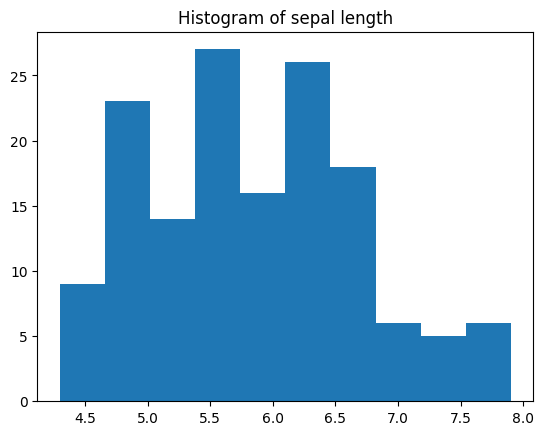

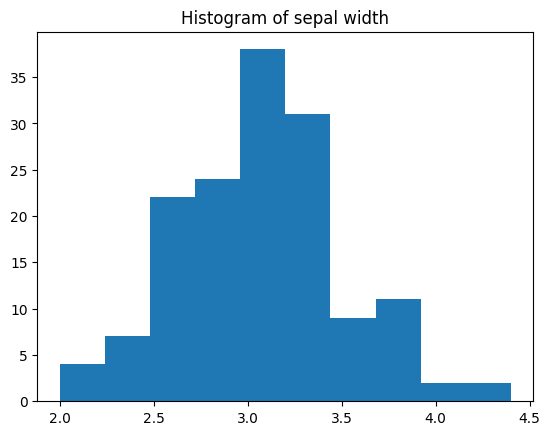

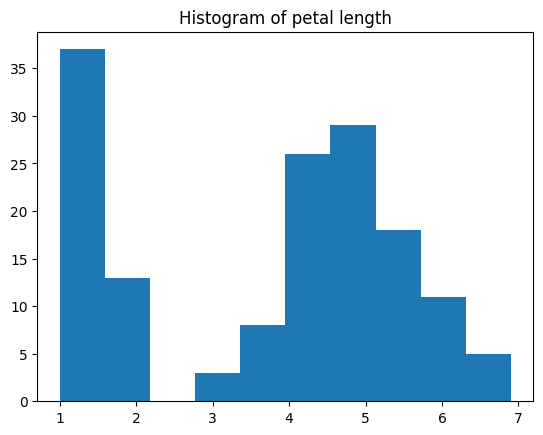

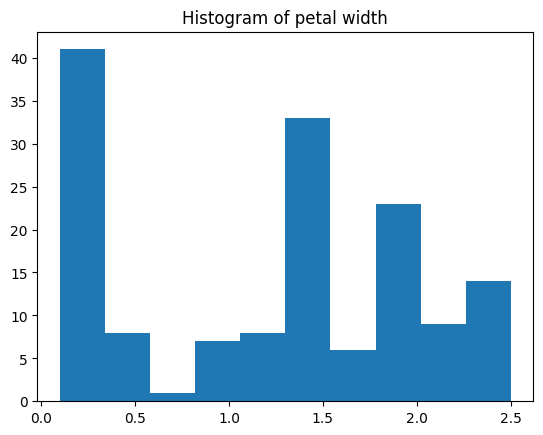

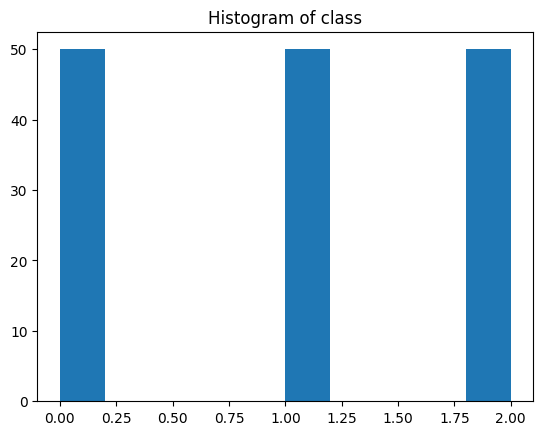

In [68]:
plotData(inputsSepalLength, 'sepal length')
plotData(inputsSepalWidth, 'sepal width')
plotData(inputsPetalLength, 'petal length')
plotData(inputsPetalWidth, 'petal width')
plotData(outputsIris, 'class')

In [97]:
np.random.seed(5)
indexesIris = [i for i in range(len(inputsIris))]
trainSampleIris = np.random.choice(indexesIris, int(0.8 * len(inputsIris)), replace=False)
testSampleIris = [i for i in indexesIris if not i in trainSampleIris]

trainInputsIris = [inputsIris[i] for i in trainSampleIris]
trainOutputsIris = [outputsIris[i] for i in trainSampleIris]
testInputsIris = [inputsIris[i] for i in testSampleIris]
testOutputsIris = [outputsIris[i] for i in testSampleIris]

#trainInputsIris, testInputsIris = normalisation(trainInputsIris, testInputsIris)

trainInputsSepalLength = [ex[0] for ex in trainInputsIris]
trainInputsSepalWidth = [ex[1] for ex in trainInputsIris]
trainInputsPetalLength = [ex[2] for ex in trainInputsIris]
trainInputsPetalWidth = [ex[3] for ex in trainInputsIris]

testInputsSepalLength = [ex[0] for ex in testInputsIris]
testInputsSepalWidth = [ex[1] for ex in testInputsIris]
testInputsPetalLength = [ex[2] for ex in testInputsIris]
testInputsPetalWidth = [ex[3] for ex in testInputsIris]

In [98]:
xxIris = [[x1, x2, x3, x4] for x1, x2, x3, x4 in zip(trainInputsSepalLength, trainInputsSepalWidth, trainInputsPetalLength, trainInputsPetalWidth)]
classifier = LogisticRegression(max_iter=200)
classifier.fit(xxIris, trainOutputsIris)
print('the learnt model with tool: ')
w0IrisList = classifier.intercept_
w1IrisList = []
w2IrisList = []
w3IrisList = []
w4IrisList = []
classes = ['setosa', 'versicolor', 'virginica']
for i in range(len(classifier.intercept_)):
  w1IrisList.append(classifier.coef_[i][0])
  w2IrisList.append(classifier.coef_[i][1])
  w3IrisList.append(classifier.coef_[i][2])
  w4IrisList.append(classifier.coef_[i][3])
  w0Iris, w1Iris, w2Iris, w3Iris, w4Iris = w0IrisList[i], w1IrisList[i], w2IrisList[i], w3IrisList[i], w4IrisList[i]
  print(classes[i], ' - f(x) = ', w0Iris, ' + ', w1Iris, ' * x1 + ', w2Iris, ' * x2 + ', w3Iris, ' * x3 + ', w4Iris, ' * x4')

xxIris = [[x1, x2, x3, x4] for x1, x2, x3, x4 in zip(trainInputsSepalLength, trainInputsSepalWidth, trainInputsPetalLength, trainInputsPetalWidth)]
myClassifier = MyMultinomialLogisticRegression()
myClassifier.fit(xxIris, trainOutputsIris)
print('the learnt model with MyClassifier: ')
myW0IrisList = myClassifier.intercept_
myW1IrisList = []
myW2IrisList = []
myW3IrisList = []
myW4IrisList = []
for i in range(len(myClassifier.intercept_)):
  myW1IrisList.append(myClassifier.coef_[0][i])
  myW2IrisList.append(myClassifier.coef_[1][i])
  myW3IrisList.append(myClassifier.coef_[2][i])
  myW4IrisList.append(myClassifier.coef_[3][i])
  myW0Iris, myW1Iris, myW2Iris, myW3Iris, myW4Iris = myW0IrisList[i], myW1IrisList[i], myW2IrisList[i], myW3IrisList[i], myW4IrisList[i]
  print(classes[i], ' - f(x) = ', myW0Iris, ' + ', myW1Iris, ' * x1 + ', myW2Iris, ' * x2 + ', myW3Iris, ' * x3 + ', myW4Iris, ' * x4')

the learnt model with tool: 
setosa  - f(x) =  9.4783633238213  +  -0.42444763100031124  * x1 +  0.8916757381886837  * x2 +  -2.3777355197415666  * x3 +  -1.0232941292970528  * x4
versicolor  - f(x) =  3.21559277639805  +  0.29183228480221307  * x1 +  -0.35492902176504876  * x2 +  -0.16154460561453182  * x3 +  -0.7201258952263353  * x4
virginica  - f(x) =  -12.693956100219415  +  0.13261534619808826  * x1 +  -0.5367467164236404  * x2 +  2.5392801253560906  * x3 +  1.7434200245233875  * x4
the learnt model with MyClassifier: 
setosa  - f(x) =  0.16145061591945373  +  0.3150249338482831  * x1 +  0.8345285195705804  * x2 +  -1.1999523570996429  * x3 +  -0.550680043815648  * x4
versicolor  - f(x) =  0.10282001922750827  +  0.17601820752167385  * x1 +  -0.28612207792308686  * x2 +  0.2017036518847994  * x3 +  -0.15174672191066246  * x4
virginica  - f(x) =  -0.26427063514696203  +  -0.4910431413699586  * x1 +  -0.548406441647492  * x2 +  0.9982487052148338  * x3 +  0.7024267657263095  * x4


In [99]:
computedTestOutputsIris = classifier.predict(testInputsIris)
myComputedTestOutputsIris = myClassifier.predict(testInputsIris)

In [100]:
print('with tool')
error = 0.0
for t1, t2 in zip(computedTestOutputsIris, testOutputsIris):
  error += (t1 - t2) ** 2
error = error / len(testOutputsIris)
print('prediction error (manual): ', error)

error = mean_squared_error(testOutputsIris, computedTestOutputsIris)
print('prediction error (tool): ', error)

print()
print('with myClassifier')
error = 0.0
for t1, t2 in zip(myComputedTestOutputsIris, testOutputsIris):
  error += (t1 - t2) ** 2
error = error / len(testOutputsIris)
print('prediction error (manual): ', error)

error = mean_squared_error(testOutputsIris, myComputedTestOutputsIris)
print('prediction error (tool): ', error)

with tool
prediction error (manual):  0.03333333333333333
prediction error (tool):  0.03333333333333333

with myClassifier
prediction error (manual):  0.0
prediction error (tool):  0.0


Specia unei flori de iris care are sepala lunga de 5.35 cm si lata de 3.85 cm, iar petala lunga de 1.25 cm si lata de 0.4cm

In [105]:
predictie3 = classifier.predict([[5.35, 3.85, 1.25, 0.4]])
if predictie3[0] == 0:
  print('Setosa')
elif predictie3[0] == 1:
  print('Versicolor')
elif predictie3[0] == 2:
  print('Virginica')

predictie3 = myClassifier.predict([[5.35, 3.85, 1.25, 0.4]])
if predictie3[0] == 0:
  print('Setosa')
elif predictie3[0] == 1:
  print('Versicolor')
elif predictie3[0] == 2:
  print('Virginica')

Setosa
Setosa
